In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
colab_dir = '/content/gdrive/My Drive/Colab Notebooks'
my_dir    = '/YoRE_V2'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
path      = colab_dir + my_dir
%cd $path

/content/gdrive/My Drive/Colab Notebooks/YoRE_V2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings   
warnings.filterwarnings("ignore")

In [ ]:
df_pr = pd.read_csv('true_data.csv')
df_pr.drop(columns = ['Unnamed: 0','Row_ID','Returned'], inplace= True)
df_pr.head(5)

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#Phân biệt giá theo bang

Phân biệt giá để góp phần làm tăng lợi nhuận, phát huy được thế lực thị trường với những hình thức đa dạng. 

In [ ]:
#Mức giảm trung bình giá mỗi bang
grouped_state = df_pr.groupby('State').agg({'Discount': 'mean',
                                   'Profit' : 'sum',
                                   'Sales' : 'sum',
                                   'Order_ID' : 'count'}).round(3)
grouped_state = grouped_state.sort_values(by=['Discount'], ascending=False)                                   
result_df = pd.DataFrame(grouped_state).reset_index()
result_df = result_df.rename(columns={'Discount': 'Avg Discount',
                          'Profit': ' Total Profit',
                          'Sales' : 'Total Sales',
                          'Order_ID' : 'Total Order'})
result_df                                   

,State,Avg Discount,Total Profit,Total Sales,Total Order
0,Illinois,0.388,-12576.469,78211.812,472
1,Texas,0.368,-21311.082,160989.317,941
2,Pennsylvania,0.328,-15023.798,112750.267,571
3,Ohio,0.321,-14274.217,71582.115,440
4,Colorado,0.308,-5580.125,26675.812,157
5,Arizona,0.303,-2942.888,29266.228,202
6,Florida,0.297,-3394.343,87833.148,372
7,Tennessee,0.293,-5437.841,26359.991,164
8,Oregon,0.284,-722.210,15729.026,104
9,North Carolina,0.281,-7717.157,53343.579,241


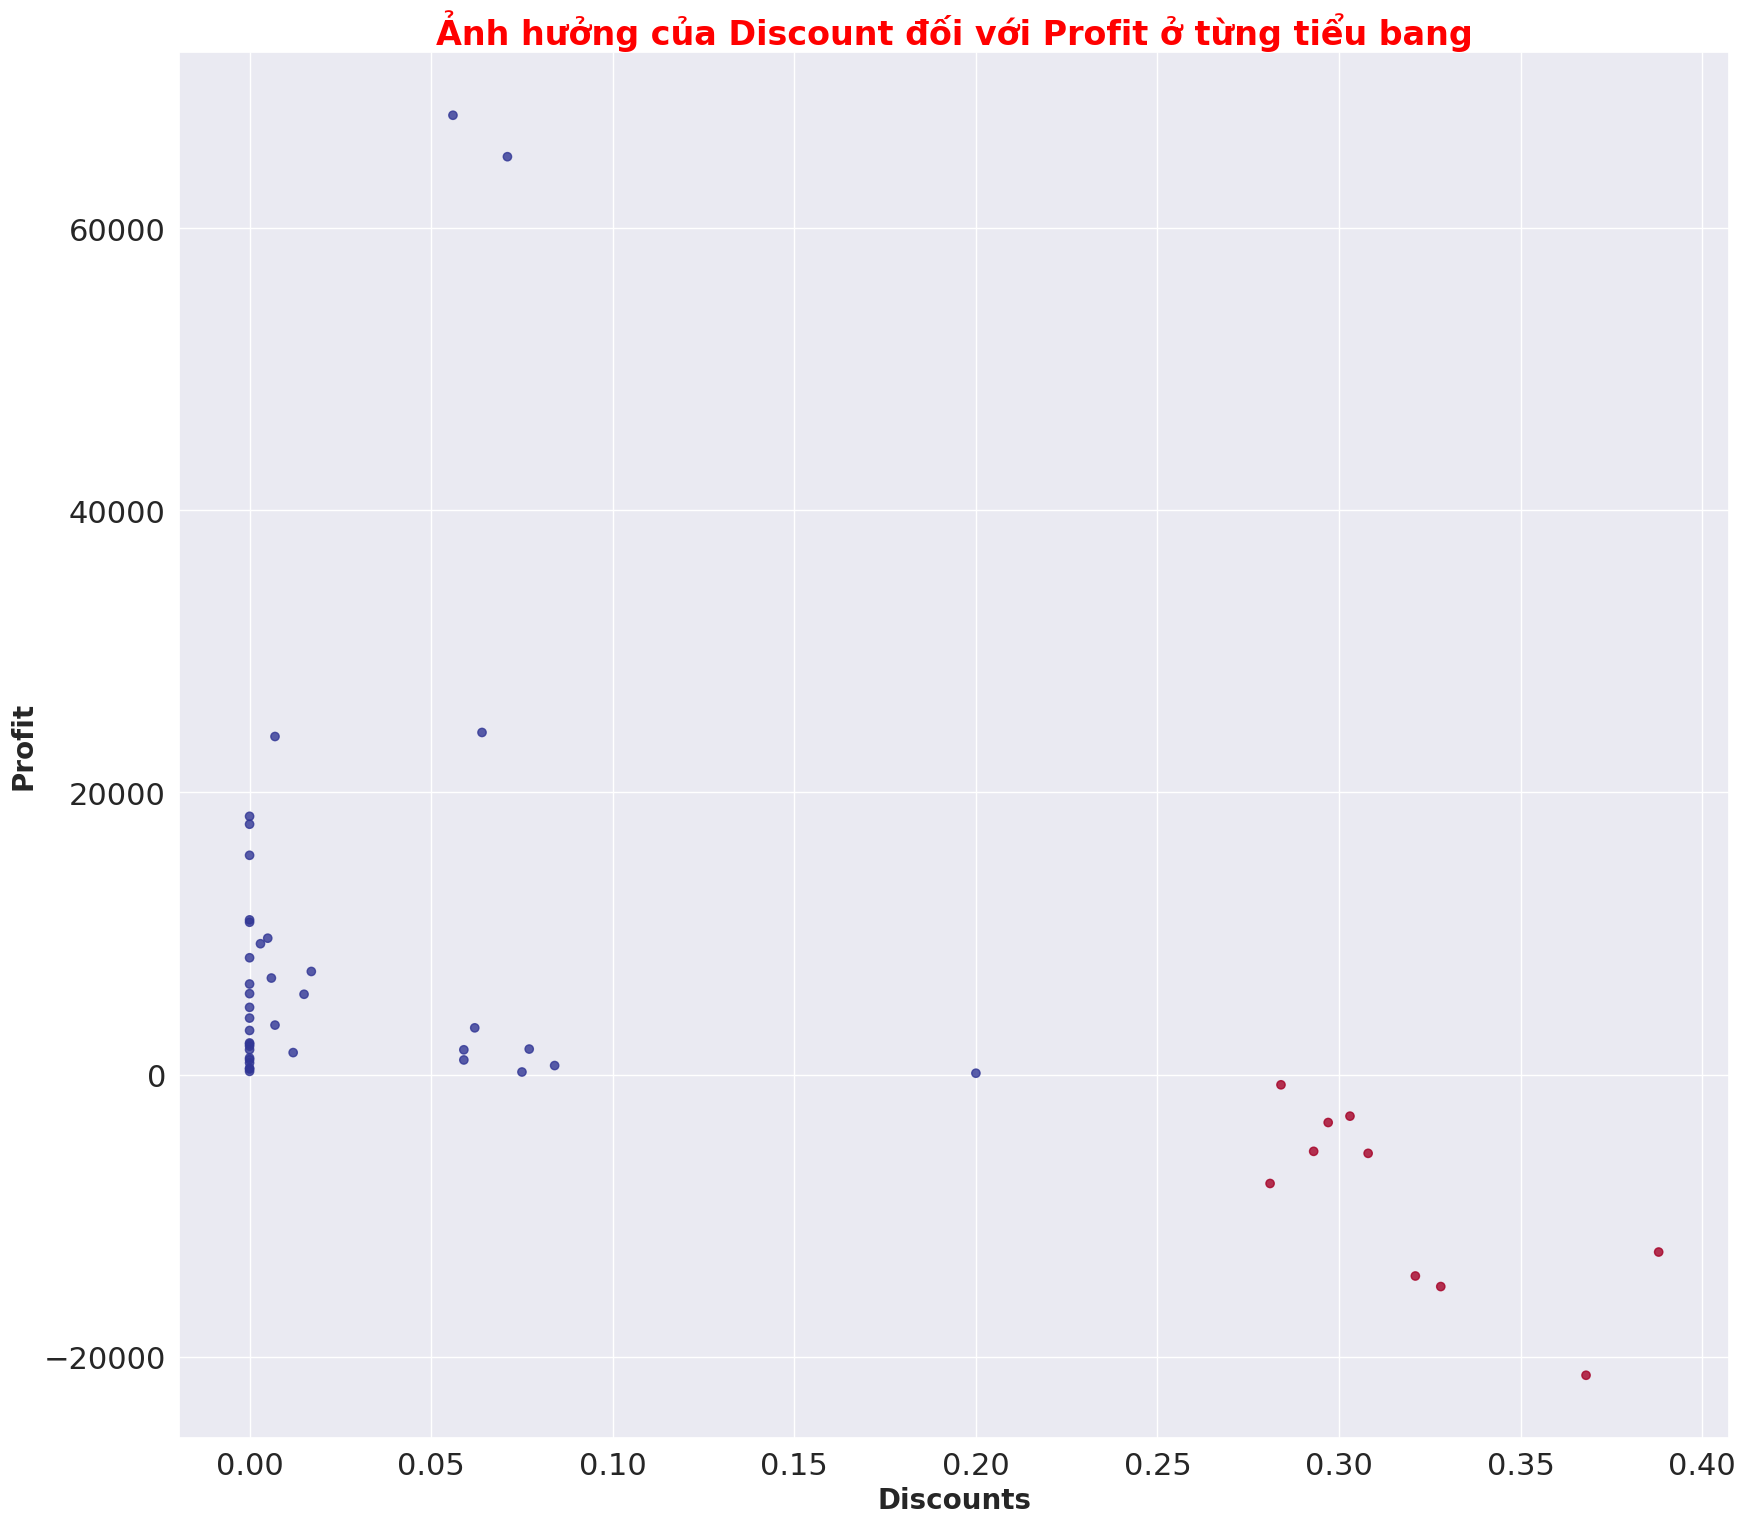

In [ ]:
plt.figure(figsize=(20,18))
#plt.scatter(x= grouped_state['Discount'],  y = grouped_state['Profit'])
plt.scatter(grouped_state['Discount'], grouped_state['Profit'], c=grouped_state['Profit'] > 0, cmap='RdYlBu', alpha=0.8)
plt.title('Ảnh hưởng của Discount đối với Profit ở từng tiểu bang',fontsize=24,color = 'red',fontweight='bold')
plt.xlabel('Discounts',fontsize=20,fontweight='bold')
plt.ylabel('Profit',fontsize=20,fontweight='bold')
# plt.legend(['Profit'])
sns.set(font_scale = 2)
plt.xticks(rotation = 360)
plt.savefig('my_plot.png')
plt.show()

Nhận xét 1: Khi mức Discount trung bình của doanh nghiệp vượt quá 20% thì lợi nhuận sẽ âm => chúng ta sẽ đi tìm hiểu về độ nhạy cảm của khách hàng đối với giá trong từng sản phẩm để doanh nghiệp có thể xem xét chú trọng vào việc thực hiện tăng/giảm giá để vừa có thể không làm giảm lượng mua và vừa có thể tối ưu hóa lợi nhuận

Nhận xét 2: Ở 10 tiểu bang có profit âm thì doanh nghiệp chưa từng bán bất kỳ sản phẩm nào ở mức giá chưa discount (các giao dịch đến từ 10 tiểu bang này luôn luôn có ưu đãi từ doanh nghiệp) 

#Kiểm tra xem 10 tiểu bang đứng đầu về mức discount có bao giờ phải mua với mức giá gốc của doanh nghiệp đề ra chưa? Hay luôn nhận được discount trên các đơn hàng? => Luôn nhận được discount

In [ ]:
Illinois = df_pr[(df_pr['State'] == 'Illinois') & (df_pr['Discount'] == 0.0)]
Illinois

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit


In [ ]:
Pennsylvania = df_pr[(df_pr['State'] == 'Pennsylvania') & (df_pr['Discount'] == 0.0)]
Pennsylvania

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit


In [ ]:
Ohio	= df_pr[(df_pr['State'] == 'Ohio') & (df_pr['Discount'] == 0.0)]
Ohio	

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit


In [ ]:
Colorado= df_pr[(df_pr['State'] == 'Colorado') & (df_pr['Discount'] == 0.0)]
Colorado

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit


In [ ]:
Arizona= df_pr[(df_pr['State'] == 'Arizona') & (df_pr['Discount'] == 0.0)]
Arizona

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit


In [ ]:
Florida= df_pr[(df_pr['State'] == 'Florida') & (df_pr['Discount'] == 0.0)]
Florida

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit


In [ ]:
Tennessee= df_pr[(df_pr['State'] == 'Tennessee') & (df_pr['Discount'] == 0.0)]
Tennessee

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit


In [ ]:
Oregon= df_pr[(df_pr['State'] == 'Oregon') & (df_pr['Discount'] == 0.0)]
Oregon

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit


In [ ]:
North_Carolina= df_pr[(df_pr['State'] == 'North Carolina') & (df_pr['Discount'] == 0.0)]
North_Carolina

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit


#Category

In [ ]:
df_pr['Order_Date'] = pd.to_datetime(df_pr['Order_Date'])
df_pr['Ship_Date'] = pd.to_datetime(df_pr['Ship_Date'])

# calculate the number of days between order_date and ship_date columns
df_pr['shipday'] = (df_pr['Ship_Date'] - df_pr['Order_Date']).dt.days

In [ ]:
df_pr['Price'] = df_pr['Sales'] / df_pr['Quantity']

In [ ]:
states0 = df_pr.groupby(['Category']).agg({'Discount': 'mean',
                                   'Profit' : 'sum',
                                   'Sales' : 'sum',
                                   'Quantity' : 'sum',
                                   'shipday' : 'mean'}).round(3)

states0 = states0.sort_values(by=['shipday'], ascending=False)

states_2 = pd.DataFrame(states0).reset_index()
states_2 = states_2.rename(columns={'Discount': 'Avg Discount',
                          'Profit': ' Total Profit',
                          'Sales' : 'Total Sales',
                          'Quantity' : 'Total Quantity',
                          'shipday' : 'Avg ShipDay'})
states_2

,Category,Avg Discount,Total Profit,Total Sales,Total Quantity,Avg ShipDay
0,Office Supplies,0.158,115596.905,670470.103,21071,3.999
1,Technology,0.131,131457.601,763445.859,6375,3.936
2,Furniture,0.177,16110.154,682780.620,7374,3.912


#Sub_Category

In [ ]:
grouped_sub = df_pr.groupby('Sub_Category').agg({'Profit' : 'sum',
                                   'Sales' : 'sum',
                                   'Order_ID' : 'count'}).round(3)
grouped_sub = grouped_sub.sort_values(by=['Profit'], ascending=True)                                   
result_sub = pd.DataFrame(grouped_sub).reset_index()
result_sub = result_sub.rename(columns={'Profit': ' Total Profit',
                          'Sales' : 'Total Sales',
                          'Order_ID' : 'Total Order'})

In [ ]:
result_sub

,Sub_Category,Total Profit,Total Sales,Total Order
0,Tables,-16667.399,189923.250,289
1,Bookcases,-3586.857,107435.355,212
2,Supplies,-1309.755,43477.576,174
3,Fasteners,857.782,2811.190,198
4,Machines,3647.485,176080.241,102
5,Labels,5141.302,11600.446,343
6,Art,6178.251,25689.668,749
7,Envelopes,6548.050,15556.656,241
8,Furnishings,10981.266,82127.614,885
9,Appliances,15566.335,97402.379,426


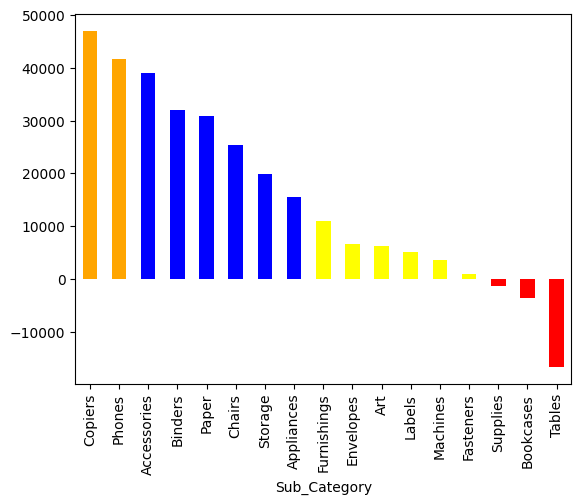

In [ ]:
colors = ['orange', 'orange', 'blue', 'blue','blue','blue','blue','blue','yellow','yellow',
         'yellow', 'yellow', 'yellow', 'yellow','red','red','red']
df_pr.groupby('Sub_Category')['Profit'].sum().sort_values(ascending=False).plot.bar(color=colors);